In [2]:
import sys
sys.path.insert(0, '../')
from lib import *

%matplotlib inline

In [29]:
x[noise_runs].to_numpy()

array([17, 18, 19, 49, 50, 51])

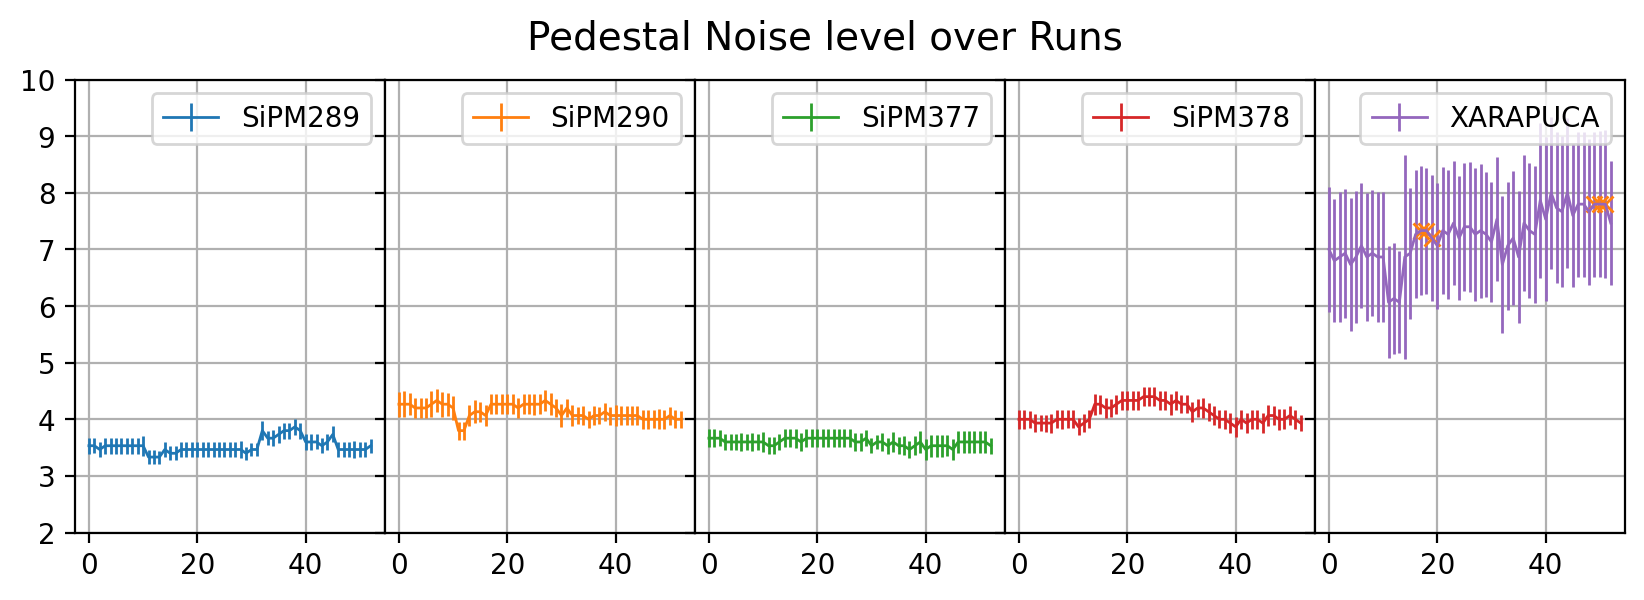

In [34]:


WEEK="APSAIA_VUV";
path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")


# path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VUV/joython/"


mean=np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
ress=np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))

i=0
for ch in Runs["Channels"].iloc[0]:
    r=0;
    for run in Runs["Run"].array:
        
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars_SW",[ch],compressed=compress)
        
        counts, bins=np.histogram(Pedestal_vars[ch]["STD"], 300,[0,20])
        mode=bins[np.argmax(counts)]
        resolution=np.std(Pedestal_vars[ch]["STD"][Pedestal_vars[ch]["STD"]<20])
        mean[i,r]=mode
        ress[i,r]=resolution
        r+=1;
    i+=1;


x=Runs["Run"].array
ys=mean
yer=ress
legend=Run_props["ChannelName"]

fig,axs=horizontal_subplots(x,ys,yer,legend)

noise_runs=(Runs["Type"]=="Noise").array.to_numpy()
axs[-1].plot(x[noise_runs].to_numpy(),ys[-1][noise_runs],'x',color="tab:orange")

## Single Run, channels distribution

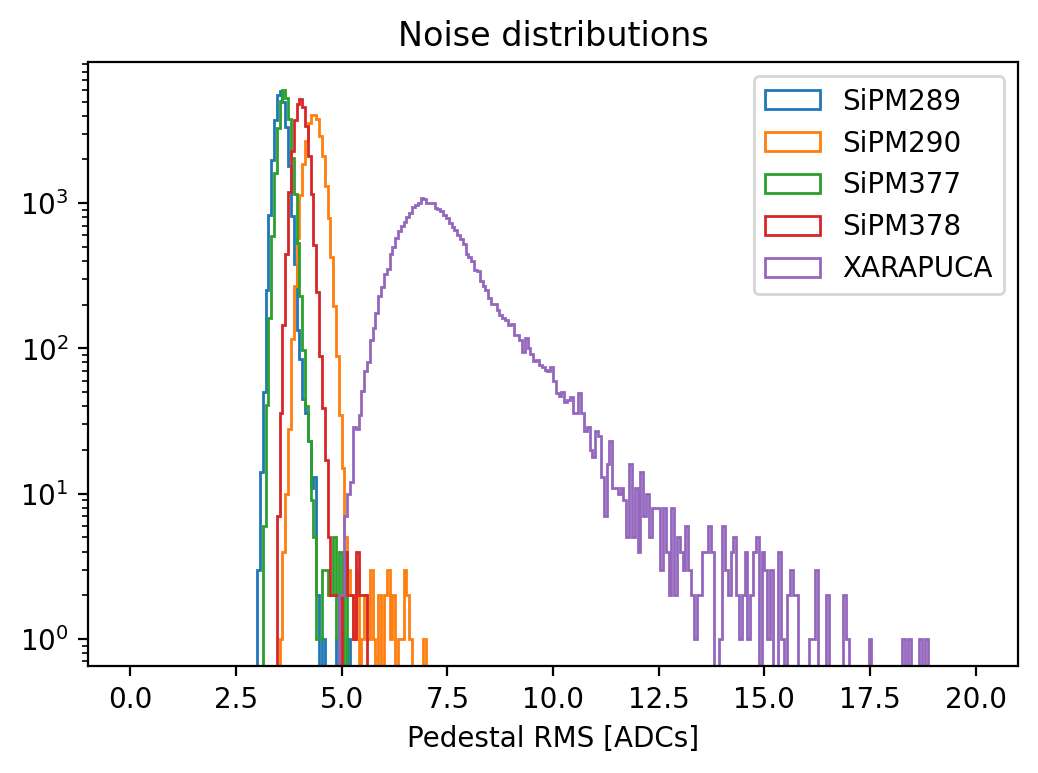

In [44]:
for run in [9]:
    Run_props=Runs[Runs["Run"]==run].iloc[0]
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False

    plt.figure(dpi=200)
    for ch in Run_props["Channels"]:
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars_SW",[ch],compressed=compress)
        
        plt.hist(Pedestal_vars[ch]["STD"], 300,[0,20],histtype="step")
        
    plt.legend(Run_props["ChannelName"])
    plt.title ("Noise distributions")
    plt.xlabel("Pedestal RMS [ADCs]")
    plt.semilogy()